## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape


(10000,)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

### Find dimensions of an image in the dataset

In [8]:
x_train[0].shape

(28, 28)

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import to_categorical
y_train=to_categorical(y_train, num_classes=10, dtype='float32')
y_test=to_categorical(y_test, num_classes=10, dtype='float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
Xtrain = x_train/255
Xtest = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)

In [13]:
print(Xtrain.shape)
print(Xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [15]:
# Define model
model = keras.models.Sequential()

    # 1st Conv Layer
model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
model.add(keras.layers.Convolution2D(32, 3, 3))
model.add(keras.layers.Activation('relu'))

    # Fully Connected Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation('relu'))
    
       # Prediction Layer
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
       # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model.fit(Xtrain, y_train, batch_size=32, epochs=10, validation_data=(Xtest, y_test),callbacks=callback_list)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 14s 237us/step - loss: 0.3706 - acc: 0.8661 - val_loss: 0.2961 - val_acc: 0.8902
Epoch 2/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.2309 - acc: 0.9154 - val_loss: 0.2534 - val_acc: 0.9117
Epoch 3/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.1652 - acc: 0.9379 - val_loss: 0.2430 - val_acc: 0.9170
Epoch 4/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.1140 - acc: 0.9571 - val_loss: 0.2692 - val_acc: 0.9168
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0723 - acc: 0.9743 - val_loss: 0.3034 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0483 - acc: 0.9818 - val_loss: 0.3582 - val_acc: 0.9095
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0356 - acc: 0.9869 - val_

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [17]:
# Define model
model1 = keras.models.Sequential()

    # 1st Conv Layer
model1.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
model1.add(keras.layers.Convolution2D(32, 3, 3))
model1.add(keras.layers.Activation('relu'))

    # Dropout
model1.add(keras.layers.Dropout(0.25))

  # Max Pooling
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # Fully Connected Layer
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128))
model1.add(keras.layers.Activation('relu'))
    
       # Prediction Layer
model1.add(keras.layers.Dense(10))
model1.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
       # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model1.fit(Xtrain, y_train, batch_size=32, epochs=10, validation_data=(Xtest, y_test), callbacks=callback_list)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.3854 - acc: 0.8633 - val_loss: 0.3248 - val_acc: 0.8850
Epoch 2/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.2469 - acc: 0.9089 - val_loss: 0.2563 - val_acc: 0.9047
Epoch 3/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1981 - acc: 0.9265 - val_loss: 0.2323 - val_acc: 0.9134
Epoch 4/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.1624 - acc: 0.9400 - val_loss: 0.2250 - val_acc: 0.9172
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1339 - acc: 0.9495 - val_loss: 0.2227 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1114 - acc: 0.9578 - val_loss: 0.2345 - val_acc: 0.9207
Epoch 7/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0924 - acc: 0.9655 - val_loss: 0.2323

In [18]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(Xtrain)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

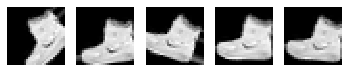

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(Xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [21]:
model1.fit_generator(datagen.flow(Xtrain, y_train,
                        batch_size=32),
                        samples_per_epoch=Xtrain.shape[0],
                        epochs=10,
                        validation_data=(Xtest, y_test), callbacks=callback_list)

Epoch 1/10
  18/1875 [..............................] - ETA: 18s - loss: 2.2657 - acc: 0.4635

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=10, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875)`
  """


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6899 - acc: 0.7470 - val_loss: 0.3127 - val_acc: 0.8883
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5102 - acc: 0.8110 - val_loss: 0.2958 - val_acc: 0.8945
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4561 - acc: 0.8310 - val_loss: 0.3069 - val_acc: 0.8915
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4311 - acc: 0.8395 - val_loss: 0.3275 - val_acc: 0.8835
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4107 - acc: 0.8488 - val_loss: 0.3116 - val_acc: 0.8884
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3957 - acc: 0.8536 - val_loss: 0.3043 - val_acc: 0.8924
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3862 - acc: 0.8594 - val_loss: 0.2952 - val_acc: 0.8940
Epoch 00007: early stopping


###  Report the final train and validation accuracy

In [22]:
loss_and_metrics = model1.evaluate(Xtest, y_test)
print("test",loss_and_metrics)


10000/10000 [==============================] - 1s 57us/step
test [0.29522342909574506, 0.894]


In [23]:
loss_and_metrics_train = model1.evaluate(Xtrain, y_train)
print("train",loss_and_metrics_train)

60000/60000 [==============================] - 3s 56us/step
train [0.23538168545365334, 0.91265]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np

### **Load CIFAR10 dataset**

In [0]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data() # fetch CIFAR-10 data


In [0]:
X_train_cifar = X_train_cifar.astype('float32')
X_test_cifar = X_test_cifar.astype('float32')
X_train_cifar /= 255
X_test_cifar /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:

# This will do preprocessing and realtime data augmentation:
datagen1 = ImageDataGenerator(
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen1.fit(X_train_cifar)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

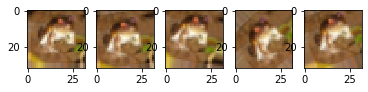

In [29]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train_cifar[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("on")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()